# **ABSTRACTION**

Consider the below given code:

In [1]:
class Mobile:
    def __init__(self, brand, price):
        print("Inside constructor")
        self.brand = brand
        self.price = price
    def purchase(self):
        print("Purchasing a mobile")
        print("This mobile has brand", self.brand, "and price", self.price)



In [2]:
print("Mobile-1")
mob1=Mobile("Apple", 20000)
mob1.purchase()
print("Mobile-2")
mob2=Mobile("Samsung",3000)
mob2.purchase()

Mobile-1
Inside constructor
Purchasing a mobile
This mobile has brand Apple and price 20000
Mobile-2
Inside constructor
Purchasing a mobile
This mobile has brand Samsung and price 3000


When we invoke the purchase() on a mobile object, we don’t have to know the details of the method to invoke it.

This ability to use something without having to know the details of how it is working is called as **abstraction.**

# Need for Encapsulation

What is the use of a lock?

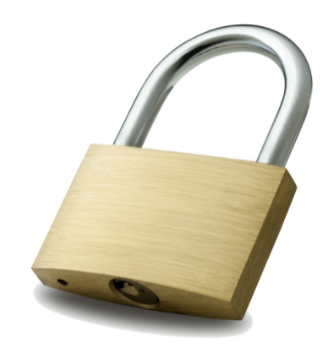

Consider the below code where the customer has a wallet_balance and there are methods which allow us to access and update that balance based on some logic.
**Just the way a lock prevents others from accessing your property, we can restrict other parts of the code from directly accessing sensitive data.**

In [ ]:
class Customer:
    def __init__(self, cust_id, name, age, wallet_balance):
        self.cust_id = cust_id
        self.name = name
        self.age = age
        self.wallet_balance = wallet_balance

    def update_balance(self,amount):
        if amount < 1000 and amount > 0:
            self.wallet_balance += amount

    def show_balance(self):
            print("The balance is ",self.wallet_balance)

c1=Customer(100, "Gopal", 24, 1000)
c1.update_balance(500)
c1.show_balance()



The balance is  1500


# Public Data Access
But with the way currently it is coded, the data can be accidentally changed by directly assigning a incorrect value to it as shown below:

In [ ]:
class Customer:
    def __init__(self, cust_id, name, age, wallet_balance):
        self.cust_id = cust_id
        self.name = name
        self.age = age
        self.wallet_balance = wallet_balance

    def update_balance(self, amount):
        if amount < 1000 and amount > 0:
            self.wallet_balance += amount

    def show_balance(self):
        print ("The balance is ",self.wallet_balance)

c1=Customer(100, "Gopal", 24, 1000)
c1.wallet_balance = 10000000000

c1.show_balance()


The balance is  10000000000


# Private Data Access

We can put a lock on that data by **adding a double underscore in front of it**, as shown in below code.

**Adding a double underscore makes the attribute a private attribute. Private attributes are those which are accessible only inside the class. This method of restricting access to our data is called encapsulation.**

In [ ]:
class Customer:
    def __init__(self, cust_id, name, age, wallet_balance):
        self.cust_id = cust_id
        self.name = name
        self.age = age
        self.__wallet_balance = wallet_balance

    def update_balance(self, amount):
        if amount < 1000 and amount > 0:
            self.__wallet_balance += amount

    def show_balance(self):
        print ("The balance is ",self.__wallet_balance)

c1=Customer(100, "Gopal", 24, 1000)
print(c1.__wallet_balance)


AttributeError: 'Customer' object has no attribute '__wallet_balance'

# How does encapsulation work?

Problem Statement

When we put a double underscore in front of the attribute name, python will internally change its name to **_Classname__attribute.**

This is why we get an error when we try to access a private attribute.

In [ ]:
class Customer:
    def __init__(self, cust_id, name, age, wallet_balance):
        self.cust_id = cust_id
        self.name = name
        self.age = age
        self.__wallet_balance = wallet_balance

    def update_balance(self,amount):
        if amount < 1000 and amount > 0:
            self.__wallet_balance += amount

    def show_balance(self):
        print("The balance is ",self.__wallet_balance)

c1=Customer(100, "Gopal", 24, 1000)
print(c1.__wallet_balance)


AttributeError: 'Customer' object has no attribute '__wallet_balance'

# **Private Data Update - Caution !**

Problem Statement

If we try to assign a value to a private variable, we end up creating a new attribute in python. Thus this code does not give an error, but it is logically flawed and does not produce the intended result.

In [ ]:
class Customer:
    def __init__(self, cust_id, name, age, wallet_balance):
        self.cust_id = cust_id
        self.name = name
        self.age = age
        self.__wallet_balance = wallet_balance

    def update_balance(self, amount):
        if amount < 1000 and amount > 0:
            self.__wallet_balance += amount

    def show_balance(self):
        print ("The balance is ",self.__wallet_balance)

c1=Customer(100, "Gopal", 24, 1000)
c1.__wallet_balance = 10000000000
c1.show_balance()




The balance is  1000


# **Accessing Private Variables**

Problem Statement

Since we know that the name of the variable changes when we make it private, we can access it using its modified name as shown in below code.

**So, if private variable can be accessed outside the class and can be modified, then what is the advantage of making it private?**

**Note: Languages like Java, C#, etc do not allow access of private variable outside the class**

In [ ]:
class Customer:
    def __init__(self, cust_id, name, age,wallet_balance):
        self.cust_id = cust_id
        self.name = name
        self.age = age
        self.__wallet_balance = wallet_balance

    def update_balance(self, amount):
        if amount < 1000 and amount> 0:
            self.__wallet_balance += amount

    def show_balance(self):
        print ("The balance is ",self.__wallet_balance)

c1=Customer(100, "Gopal", 24, 1000)
c1._Customer__wallet_balance = 10000000000
c1.show_balance()


The balance is  10000000000


# Encapsulation - Just a Caution Sign !

Any lock can be broken by a determined thief. Similarly, just because you make your code private, does not mean it is not accessible to other developers. When a developer sees a private variable, it’s a gentleman's agreement not to access it directly. It is used to only prevent accidental access.

Thus in python encapsulation is more like a caution sign than a lock. A caution sign is there so that you don’t accidentally break a rule. But if you still want to break it you can, with consequence ;)
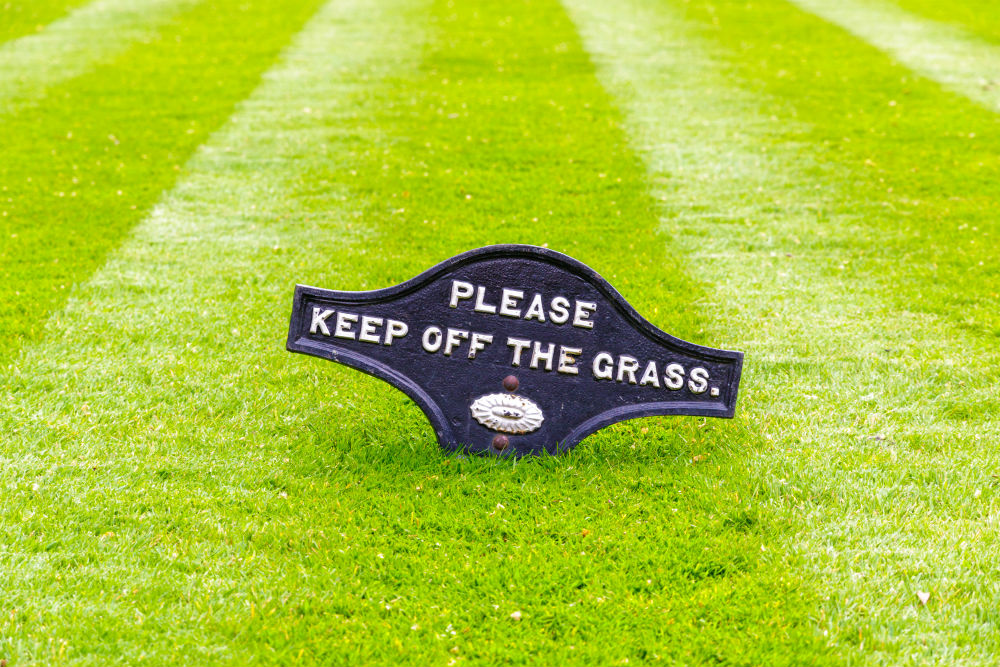 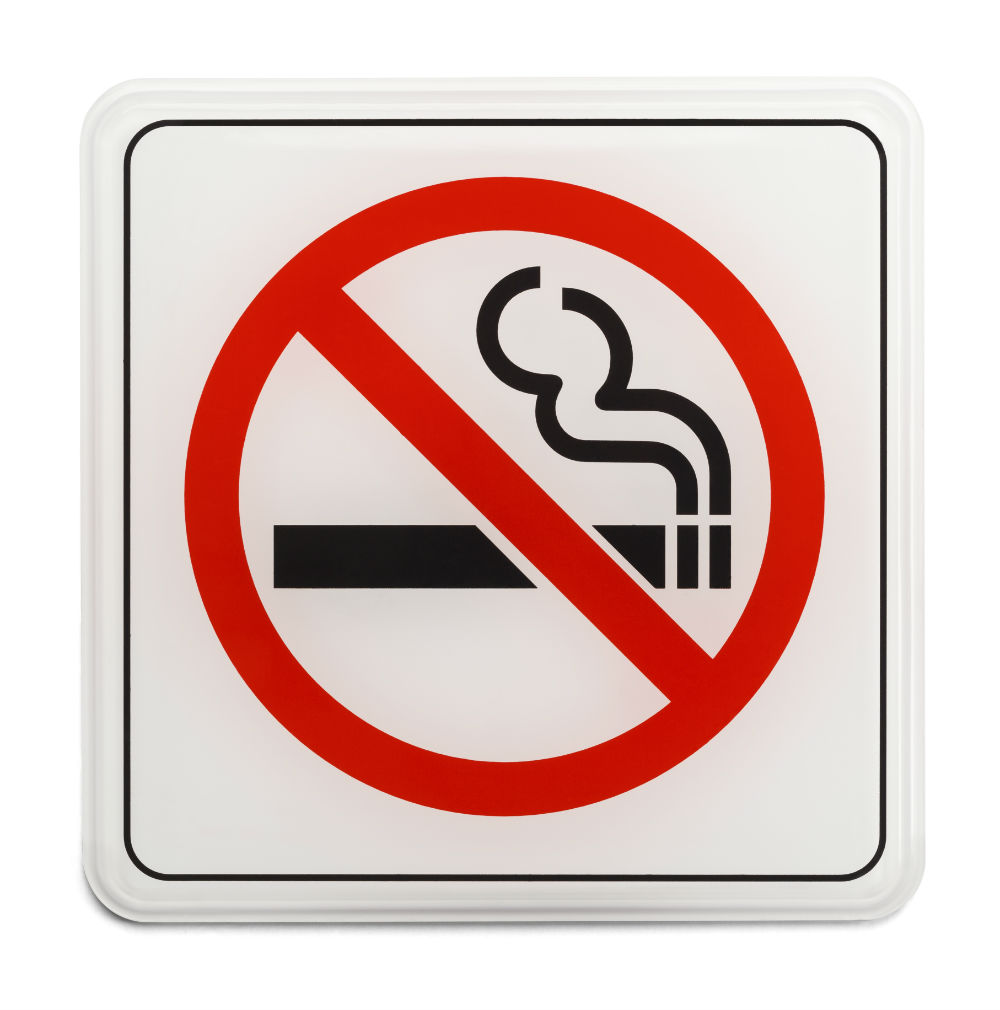

# **Getters & Setters**
To have a error free way of accessing and updating private variables, we create specific methods for this.


*  The methods which are meant to set a value to a private variable are called **setter methods.**

*   The methods meant to access private variable values are called **getter methods.**

The below code is an example of getter and setter methods:



In [ ]:
class Customer:
    def __init__(self, id, name, age, wallet_balance):
        self.id = id
        self.name = name
        self.age = age
        self.__wallet_balance = wallet_balance

    def set_wallet_balance(self, amount):
        if amount < 1000 and amount > 0:
            self.__wallet_balance = amount

    def get_wallet_balance(self):
        return self.__wallet_balance

c1=Customer(100, "Gopal", 24, 1000)
c1.set_wallet_balance(120)
print(c1.get_wallet_balance())


120


# **Class Diagram**
A lot of things can go wrong in communication.

To ensure that programmers all over understand each other properly, we need a common way of representing a class. This is called as a class diagram. This is similar to a circuit diagram or a plan or machine diagram which allows engineers to understand each others' ideas clearly.



# **Visibility Notation:**

Visibility notations indicate the access level of attributes and methods. Common visibility notations include:
*  **+** for public (visible to all classes)
*  **-** for private (visible only within the class)
*  **#** for protected (visible to subclasses)
*  **~** for package or default visibility (visible to classes in the same package)

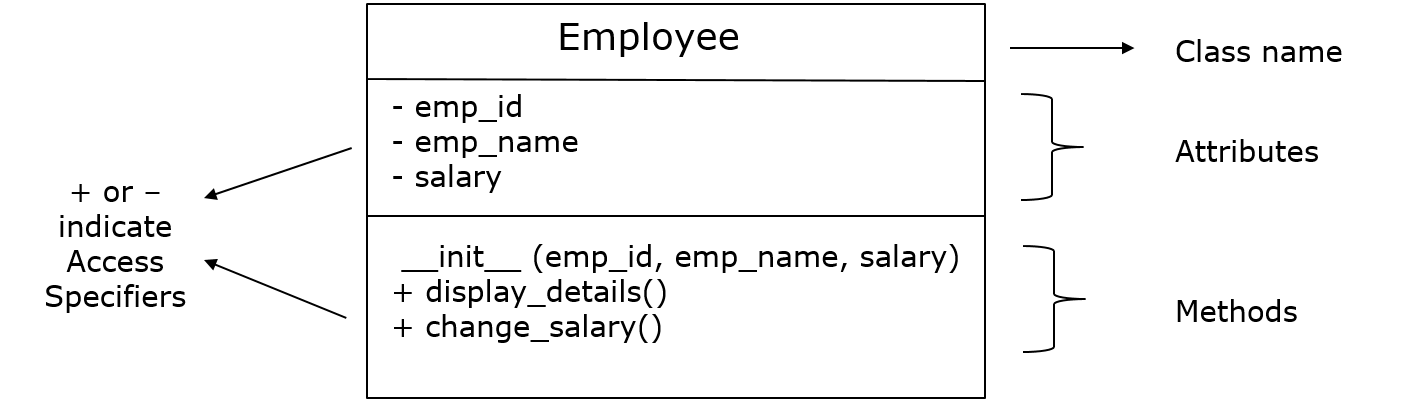

Note: We can create private methods by adding a double underscore in front of it, just like private variables. Also, if a method has both leading and trailing double underscores ( like __ init __ , __ str __, etc) it indicates that it is a special built-in method. As per coding convention, we are not supposed to create our own methods with both leading and trailing underscores.

# **Exercise on Access Specifiers - Level 1**

In the Athlete class given below,

*  make all the attributes private and
*  add the necessary accessor and mutator methods

Represent Maria, the runner and make her run.

In [ ]:

class Athlete:
    def __init__(self,name,gender):
        self.name=name
        self.gender=gender

    def running(self):
        if(self.gender=="girl"):
            print("150mtr running")
        else:
            print("200mtr running")


# **Getters & Setters - Way to Code !**

All setter methods must accept the value to be updated as a parameter and all getter methods must not have any parameter and they must return the value.

Setter methods are called as mutator methods ( as they change or mutate the value ) and the getter methods are called accessor methods ( as they access the values )



In [ ]:
class Customer:
    def __init__(self, id, name, age, wallet_balance):
        self.id = id
        self.name = name
        self.age = age
        self.__wallet_balance = wallet_balance
    def set_wallet_balance(self, amount):
        if amount < 1000 and amount>  0:
            self.__wallet_balance = amount
    def get_wallet_balance(self):
        return self.__wallet_balance
c1=Customer(100, "Gopal", 24, 1000)
c1.set_wallet_balance(120)
print(c1.get_wallet_balance())


120


# **Abstraction & Encapsulation - Summary**

*  Encapsulation is preventing access to a data outside the class

*  Adding a __ in front of a attribute makes it private

*  In python, adding a __ changes the name of the attribute to _Classname__attribute

## **Pass by Reference - Try out**

Problem Statement

What happens when we pass an object as a parameter to a function? In the below code, what will be the output?

In [ ]:
class Mobile:
    def __init__(self, price, brand):
        self.price = price
        self.brand = brand

def change_price(mobile_obj):
    mobile_obj.price = 3000

mob1=Mobile(1000, "Apple")
change_price(mob1)
print (mob1.price)


3000


# **Understanding Pass by Reference**
When we pass an object to a parameter, the parameter name becomes a reference variable.

Recollecting the balloon example, it is like creating one more ribbon to the same balloon. Thus there is one object with two reference variable, one the formal parameter and the actual parameter. Thus any change made through one reference variable will affect the other as well.

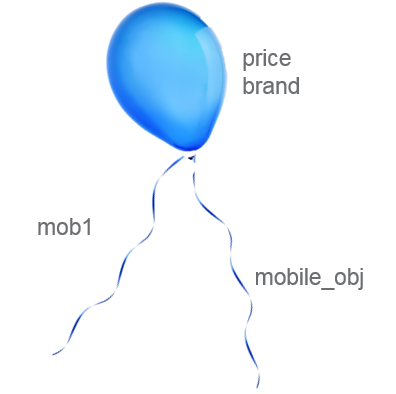

In [ ]:
class Mobile:
    def __init__(self, price, brand):
        self.price = price
        self.brand = brand

    def change_price(mobile_obj):
        print ("Id of object inside function", id(mobile_obj))
        mobile_obj.price = 3000

mob1=Mobile(1000, "Apple")
print ("Id of object in driver code", id(mob1))

mob1.change_price()
print ("Price of mob1 ", mob1.price)

Id of object in driver code 134009930832032
Id of object inside function 134009930832032
Price of mob1  3000


# List of Objects - Try out

Problem Statement
We can store a number of objects inside a list or a dictionary.

The below example, we have a list of mobile objects and we are iterating over the list and printing the values.

Run the below code and observe the output.

In [ ]:
class Mobile:
    def __init__(self, brand, price):
        self.brand = brand
        self.price = price

mob1=Mobile("Apple", 1000)
mob2=Mobile("Samsung", 2000)
mob3=Mobile("Apple", 3000)
mob4=Mobile("Samsung", 4000)
mob5=Mobile("Apple", 5000)

list_of_mobiles=[mob1, mob2, mob3, mob4, mob5]

for mobile in list_of_mobiles:
    print (mobile.brand,mobile.price)


Apple 1000
Samsung 2000
Apple 3000
Samsung 4000
Apple 5000


**Dictionary of Objects - Try out**

We can also store objects in a dictionary. For example, in the below code we are storing all the mobile objects in a dictionary and printing only those mobiles whose price is greater than 3000.



In [ ]:
class Mobile:
    def __init__(self,brand,price):
        self.brand = brand
        self.price = price

mob1=Mobile("Apple", 1000)
mob2=Mobile("Samsung", 5000)
mob3=Mobile("Apple", 3000)

mob_dict={
          "m1":mob1,
          "m2":mob2,
          "m3":mob3
          }

for key,value in mob_dict.items():
    if value.price > 3000:
        print (value.brand,value.price)


Samsung 5000


# **Dictionary of List of Objects - Try out**
Problem Statement

We have a list of customer objects. Complete the code so that we have a dictionary of customer objects based on location


                                                

In [ ]:
class Customer:
    def __init__(self, cust_id, cust_name, location):
        self.cust_id = cust_id
        self.cust_name = cust_name
        self.location = location

list_of_customers = [Customer(101, 'Mark', 'US'),
Customer(102, 'Jane', 'Japan'),
Customer(103, 'Kumar', 'India')]

dict_of_customer={}

# Solution

In [ ]:
for customer in list_of_customers:
    dict_of_customer[customer.location] = customer

print ("Customer name in India is "+dict_of_customer["India"].cust_name)

for key,value in dict_of_customer.items():
    print ("Location: "+key+", Name: "+value.cust_name+", Id: "+(str(value.cust_id)))


Customer name in India is Kumar
Location: US, Name: Mark, Id: 101
Location: Japan, Name: Jane, Id: 102
Location: India, Name: Kumar, Id: 103


Certainly! Here are some practice questions to help you master getter and setter methods in Python OOP. Getter and setter methods are essential for ensuring controlled access to attributes (encapsulation) and performing validation or additional processing when setting or retrieving attribute values.

### Practice Questions on Getter and Setter Methods

1. **Bank Account Management System**
   - Create a `BankAccount` class with private attributes `account_number`, `account_holder`, and `balance`.
   - Implement getter and setter methods for `account_number` and `account_holder`.
   - Implement a setter method for `balance` that checks if the balance being set is non-negative.

2. **Student Record System**
   - Create a `Student` class with private attributes `student_id`, `name`, `age`, and `grades` (a list of integers).
   - Implement getter and setter methods for `name` and `age`.
   - Implement a setter method for `grades` that ensures all grades are within a valid range (e.g., 0-100).

3. **Employee Management System**
   - Create an `Employee` class with private attributes `employee_id`, `name`, `position`, and `salary`.
   - Implement getter and setter methods for `position`.
   - Implement a setter method for `salary` that ensures the salary being set is positive.

4. **Library Book Management System**
   - Create a `Book` class with private attributes `title`, `author`, and `isbn`.
   - Implement getter and setter methods for `title` and `author`.
   - Implement a getter method for `isbn`.

5. **Online Shopping System**
   - Create a `Product` class with private attributes `product_id`, `name`, and `price`.
   - Implement getter and setter methods for `product_id`.
   - Implement setter methods for `name` and `price` that perform validation (e.g., ensure `name` is not empty and `price` is positive).



